In [1]:
# Impor Pustaka yang Diperlukan
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Input Data
path = '/content/drive/MyDrive/training_ml_geospasial_geosoftware/sesi5-AlgoSupervisedDataVektor/Processed JKT/processed_jkt.shp'
data = gpd.read_file(path)

In [4]:
## Pemeriksaan Null Data
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECT_ID   267 non-null    float64 
 1   KODE_DESA   267 non-null    object  
 2   DESA        267 non-null    object  
 3   KODE        267 non-null    float64 
 4   PROVINSI    267 non-null    object  
 5   KAB_KOTA    267 non-null    object  
 6   KECAMATAN   267 non-null    object  
 7   DESA_KELUR  267 non-null    object  
 8   JUMLAH_PEN  267 non-null    float64 
 9   JUMLAH_KK   267 non-null    float64 
 10  LUAS_WILAY  267 non-null    float64 
 11  KEPADATAN   267 non-null    float64 
 12  PERPINDAHA  267 non-null    float64 
 13  PERUBAHAN   267 non-null    float64 
 14  WAJIB_KTP   267 non-null    float64 
 15  ISLAM       267 non-null    float64 
 16  KRISTEN     267 non-null    float64 
 17  KHATOLIK    267 non-null    float64 
 18  HINDU       267 non-null    float64 
 19  

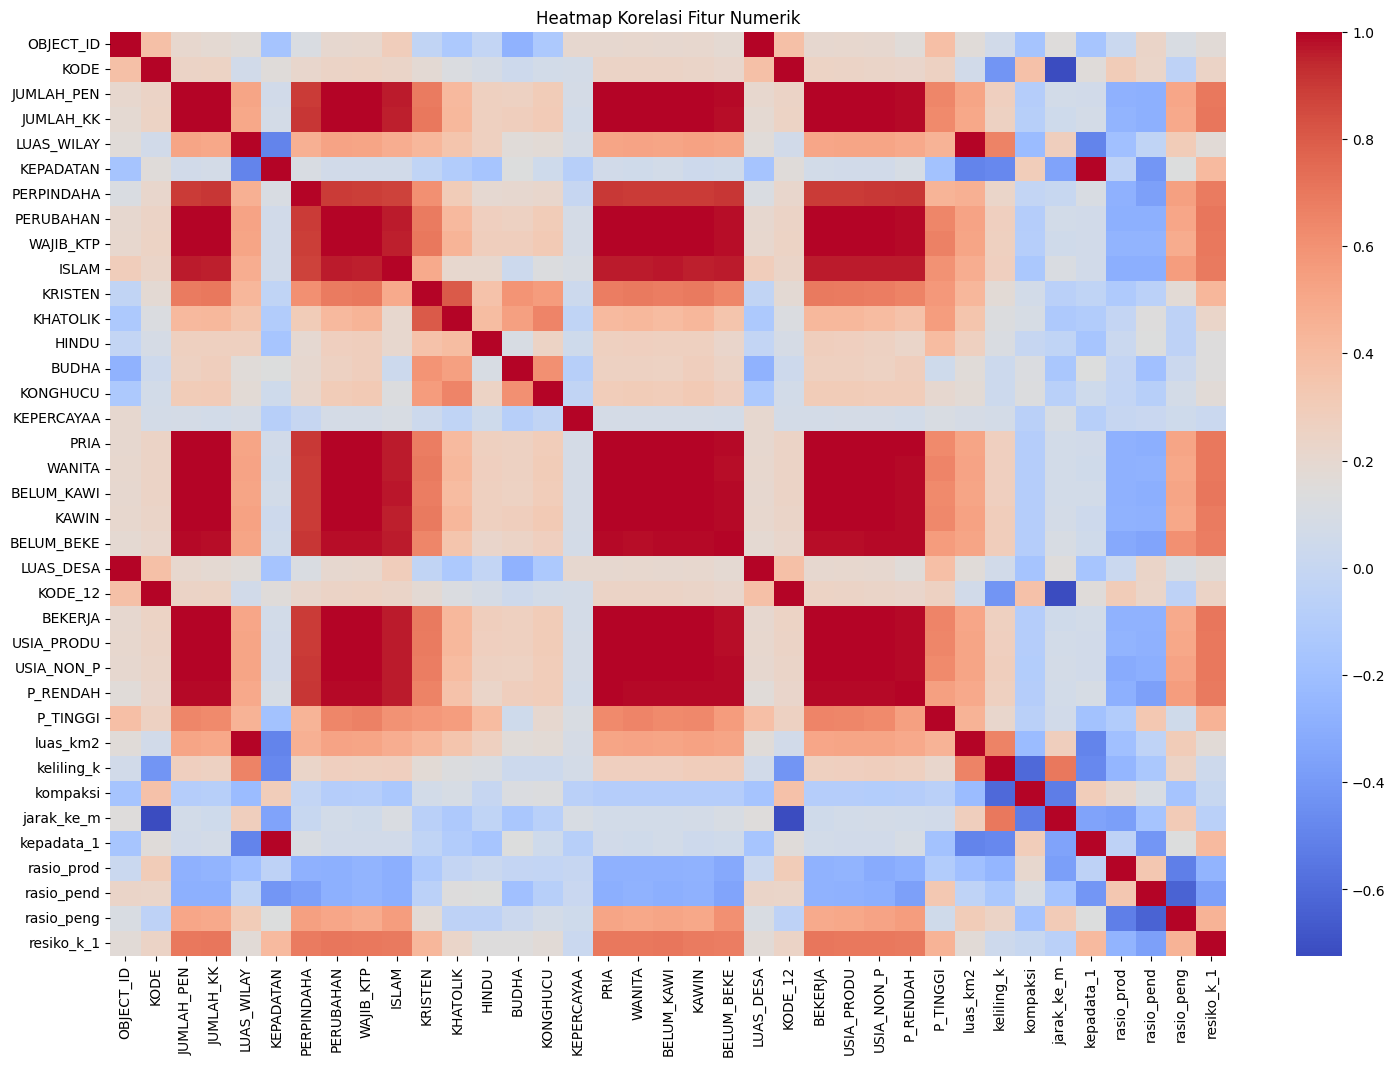

In [5]:
## Pemilihan Fitur dengan metode Kelerlasi Matriks
import seaborn as sns
import matplotlib.pyplot as plt
# Pilih kolom numerik saja untuk korelasi
numeric_data = data.select_dtypes(include='number')
# Hitung korelasi
corr = numeric_data.corr()
# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

In [7]:
## Pemilihan Fitur
data_yg_telah_dipilih = data[['JUMLAH_PEN','KEPADATAN','PERPINDAHA','WAJIB_KTP','PRIA','WANITA',
                              'BELUM_KAWI','KAWIN','BELUM_BEKE','BEKERJA','USIA_PRODU','USIA_NON_P','P_RENDAH','P_TINGGI','rasio_peng']]

In [8]:
X = data_yg_telah_dipilih
y = data['resiko_k_1']

In [11]:
## Membagi data mejadi Train dan Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [12]:
## Membangun dan Melatih Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
## Evaluasi Awal Model
y_pred = rf.predict(X_test)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.70      0.78      0.74         9
           2       0.94      0.97      0.95        31

    accuracy                           0.91        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.91      0.91      0.91        54


Confusion Matrix:
[[12  2  0]
 [ 0  7  2]
 [ 0  1 30]]


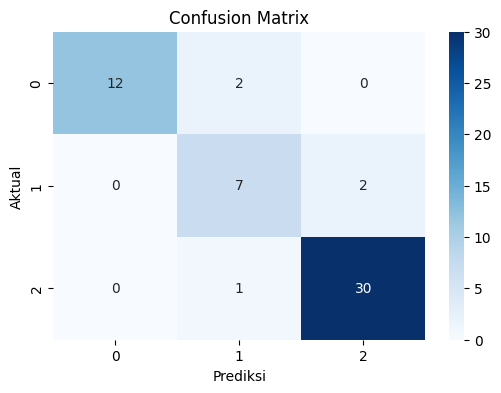

In [15]:
## Visualisasi Confusion Matrix
# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
## Fitur Analisis
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({
'Fitur': feature_names,
'Pentingnya': importances
}).sort_values(by='Pentingnya', ascending=False)

## Print Hasil
print("\nFeature Importance:")
print(feat_imp_df.head(10))


Feature Importance:
         Fitur  Pentingnya
1    KEPADATAN    0.153488
2   PERPINDAHA    0.129759
12    P_RENDAH    0.121928
9      BEKERJA    0.072584
10  USIA_PRODU    0.069649
4         PRIA    0.062027
11  USIA_NON_P    0.054201
0   JUMLAH_PEN    0.052665
6   BELUM_KAWI    0.050028
3    WAJIB_KTP    0.046606


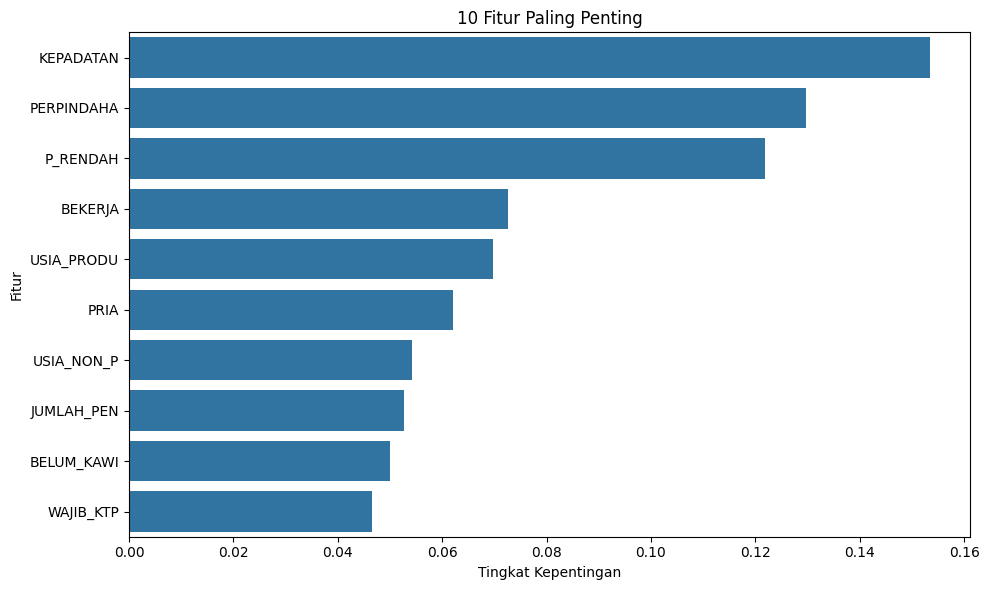

In [17]:
# Visualisasi Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Pentingnya', y='Fitur',
data=feat_imp_df.head(10))
plt.title('10 Fitur Paling Penting')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

In [18]:
## Hyper Parameter Tuning
# Hyperparameter Tuning dengan Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': [None, 'balanced']
    }

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=99),
                           param_grid=param_grid,cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
639 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

Best parameters found: {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
# Evaluasi Model Terbaik
print("\nParameter Terbaik:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nEvaluasi Model Setelah Grid Search:")
print(classification_report(y_test, y_pred_best))


Parameter Terbaik: {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Evaluasi Model Setelah Grid Search:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.70      0.78      0.74         9
           2       0.94      0.97      0.95        31

    accuracy                           0.91        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.91      0.91      0.91        54



In [20]:
## Menyimpan hasil & Visualisasi Hasil Prediksi Random Forest
data['prediksi_rf'] = best_model.predict(X)

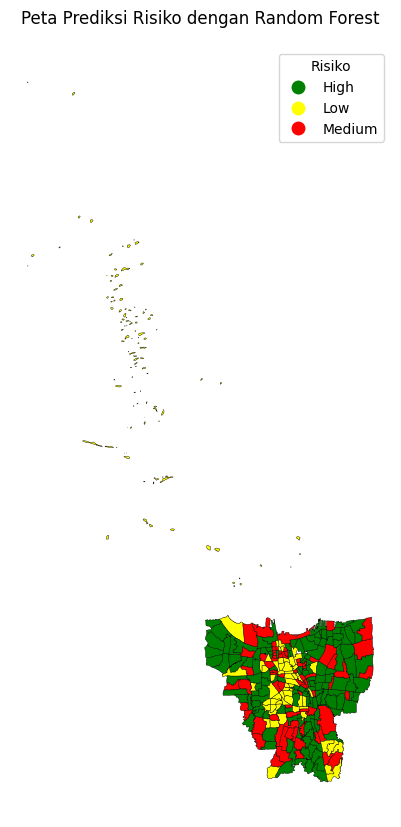

In [23]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Mapping angka ke label kategori risiko
label_map = {0: 'Low', 1: 'Medium', 2: 'High'}

# Label dan warna yang sesuai
label_map = {0: 'Low', 1: 'Medium', 2: 'High'}
colors = ['green', 'yellow', 'red']
cmap = ListedColormap(colors)

# Buat kolom label dari prediksi_rf
data['prediksi_label'] = data['prediksi_rf'].map(label_map)

# Plot dengan label kategori
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
data.plot(column='prediksi_label',
categorical=True,
legend=True,
legend_kwds={'title': 'Risiko'},
cmap=cmap,
ax=ax,
edgecolor='black',
linewidth=0.3)
ax.set_title('Peta Prediksi Risiko dengan Random Forest')
ax.axis('off')
plt.show()

In [24]:
plt.savefig('Map_Hasil_prediksi_rf.png')

<Figure size 640x480 with 0 Axes>